# Лабораторная работа №3: Регрессионный анализ
Выполнил студент гр. 1384 Сочков Илья. Вариант №15

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

**Регрессионная модель:**
Регрессионная модель переменной $Y$ по переменной $X$ выражается в виде уравнения $Y=\beta X+\varepsilon$

**МНК (метод наименьших квадратов):** <br>
Идея МНК - минимизация вектора ошибок регресионных моделей
$RSS(\beta)=\left\| Y-X^T\beta \right\|=(Y-X^T\beta)^T\cdot(Y-X^T\beta)\to min_{\beta}$<br>
Вследствие этого возникают нормальные уравнения: $XX^T\beta=XY$<br>
Решение системы данных уравнений - вектор коэффициентов $\widehat{\beta}$: $\widehat{\beta}=(XX^T)^{-1}XY$

**Несмещенная оценка дисперсии:** $s^2 = \frac{(Y - X^T\beta)^T(Y - X^T\beta)}{n-r}$ , где $r = rank(X)$. 

**Доверительный интервал:** <br>
$\psi = C^T \beta$<br>
$b_\psi = C^T (XX^T)^{-1}C$<br>
$\cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r}$<br>
$x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2}$<br>
$P_\theta\left(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha\right) = 1 -\alpha$<br>
$\widehat \psi -x_{\alpha}s\sqrt{b} \le \psi \le \widehat \psi -x_{\alpha}s\sqrt{b}$ - доверительный интервал для $\psi$.

**Уравнение доверительного эллипсоида:** $A_{\alpha}=\left\{ \overrightarrow{X}:(\overrightarrow{X}-\widehat{\psi})^{\intercal}B^{-1}(\overrightarrow{X}-\widehat{\psi})\le qS^{2}X_{\alpha} \right\}$  


**F-критерий:** <br>
$F=\frac{MSR}{MSE}$, где MSR - среднеквадратичное отклонение отклонение, MSE - среднеквадратичное отклонение ошибки.
Высчитывается критическиое значение - квантиль распределения Фишера с заданными степенями свободы для заданного уровня доверия. Если F превосходит найденный квантиль, то зависимость есть, иначе нет.

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, ksone, t, f, norm, chisquare

Была приведена таблица и данные для выполнения работы.

In [175]:
data = [[0.37, 6], [8.86, 6], [12.76, 3], [0.29, 5], [19.53, 5], [14.91, 6], [4.11, 4], [6, 4], [12.52, 5], [9.02, 5],
        [13.25, 4], [16.03, 7], [11.91, 4], [2.43, 4], [0.1, 5], [2.72, 4], [7.49, 5], [12.83, 6], [7.88, 1], [8.6, 4],
        [14.78, 2], [0.66, 5], [12.54, 6], [9.21, 3], [6.55, 5], [12.85, 5], [2.89, 6], [10.50, 8], [1.51, 5], [19.3, 7],
        [2.89, 5], [11.24, 5], [5.43, 4], [13.46, 4], [4.62, 6], [9.51, 1], [10, 5], [10.73, 4], [9.75, 3], [1.08, 6],
        [3.4, 5], [10.23, 5], [17.39, 6], [8.07, 4], [15.87, 3], [10.27, 7], [8.91, 5], [25.47, 5], [17.29, 3], [10.49, 4]]
alpha = 0.1
h = 2.9
for i in range(len(data)):
    print(f"{i+1}) y: {data[i][0]}, x: {data[i][1]}; ")
    if i % 5 == 4 and i > 0:
        print()

1) y: 0.37, x: 6; 
2) y: 8.86, x: 6; 
3) y: 12.76, x: 3; 
4) y: 0.29, x: 5; 
5) y: 19.53, x: 5; 

6) y: 14.91, x: 6; 
7) y: 4.11, x: 4; 
8) y: 6, x: 4; 
9) y: 12.52, x: 5; 
10) y: 9.02, x: 5; 

11) y: 13.25, x: 4; 
12) y: 16.03, x: 7; 
13) y: 11.91, x: 4; 
14) y: 2.43, x: 4; 
15) y: 0.1, x: 5; 

16) y: 2.72, x: 4; 
17) y: 7.49, x: 5; 
18) y: 12.83, x: 6; 
19) y: 7.88, x: 1; 
20) y: 8.6, x: 4; 

21) y: 14.78, x: 2; 
22) y: 0.66, x: 5; 
23) y: 12.54, x: 6; 
24) y: 9.21, x: 3; 
25) y: 6.55, x: 5; 

26) y: 12.85, x: 5; 
27) y: 2.89, x: 6; 
28) y: 10.5, x: 8; 
29) y: 1.51, x: 5; 
30) y: 19.3, x: 7; 

31) y: 2.89, x: 5; 
32) y: 11.24, x: 5; 
33) y: 5.43, x: 4; 
34) y: 13.46, x: 4; 
35) y: 4.62, x: 6; 

36) y: 9.51, x: 1; 
37) y: 10, x: 5; 
38) y: 10.73, x: 4; 
39) y: 9.75, x: 3; 
40) y: 1.08, x: 6; 

41) y: 3.4, x: 5; 
42) y: 10.23, x: 5; 
43) y: 17.39, x: 6; 
44) y: 8.07, x: 4; 
45) y: 15.87, x: 3; 

46) y: 10.27, x: 7; 
47) y: 8.91, x: 5; 
48) y: 25.47, x: 5; 
49) y: 17.29, x: 3; 
50) y: 1

**1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_{0}$ и масштаба $\beta_{1}$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной ошибки.**

Линейная регрессионная модель переменной $Y$ по переменной $X$ выражается в виде уравнения $$Y=\beta_{0}+\beta_{1}X+\varepsilon$$
В данной модели имеем нормальные уравнения в матричном виде: $X X^T \beta = XY$.<br>
Решением будет поиск матрицы коэффициентов $\beta =(X X^T)^{-1} XY$

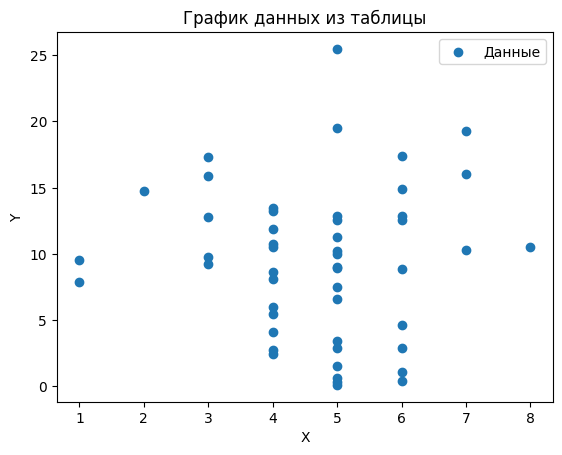

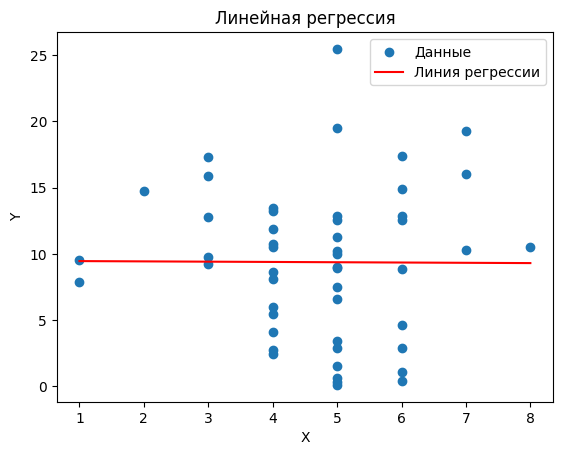

Вектор коэффициентов: [ 9.47115736 -0.02152284]


In [176]:
data = np.array(data)

# Разделение данных на Y и X
Y = data[:, 0]
X = data[:, 1]

# Добавление столбца из единиц для учета свободного члена
X_with_intercept = np.column_stack((np.ones_like(X), X)).T

# МНК оценка параметров
beta = np.linalg.inv(X_with_intercept @ X_with_intercept.T) @ X_with_intercept @ Y

# Построение линии регрессии
x_range = np.linspace(min(X), max(X), 100)
regression_line = beta[0] + beta[1] * x_range

# Построение графика
plt.scatter(X, Y, label='Данные')
plt.title('График данных из таблицы')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

plt.scatter(X, Y, label='Данные')
plt.plot(x_range, regression_line, color='red', label='Линия регрессии')
plt.title('Линейная регрессия')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print(f'Вектор коэффициентов: {beta}')

**2. Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.**

Несмещенная дисперсия:  33.33020774111675


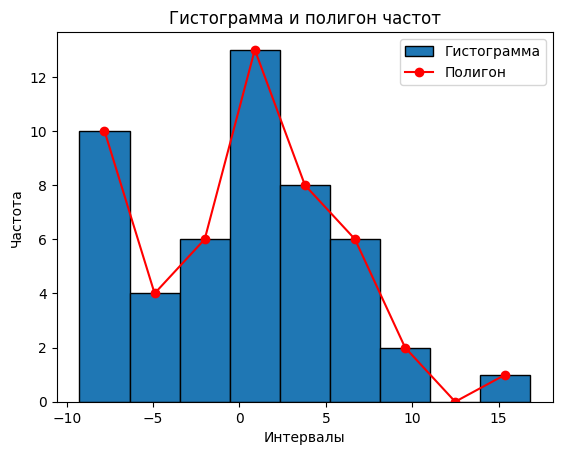

[10  4  6 13  8  6  2  0  1]
[-9.26354315 -6.36354315 -3.46354315 -0.56354315  2.33645685  5.23645685
  8.13645685 11.03645685 13.93645685 16.83645685]


In [177]:
# Предсказанные значения модели
predicted_values = beta @ X_with_intercept
# Ошибки модели
residuals = Y - predicted_values

# Оценка дисперсии
unbiased_variance = np.sum(residuals ** 2) / (len(Y) - len(beta))
print("Несмещенная дисперсия: ", unbiased_variance)

# Построение гистограммы ошибок
bins = np.arange(min(residuals), max(residuals) + h, h)
plt.hist(residuals, bins=bins, edgecolor='black', label='Гистограмма')
plt.title("Гистограмма и полигон частот")
plt.xlabel("Интервалы")
plt.ylabel("Частота")

hist, _ = np.histogram(residuals, bins=bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bin_centers, hist, color='red', marker='o', linestyle='-', label='Полигон')
plt.legend()
plt.show()

print(hist)
print(bins)

In [178]:
# проверка гипотезы нормальности ошибок на уровне значимости alpha=0.1
def calculate_expected_freq(n, intervals, variance):
  k = len(intervals)
  probabilities = norm.cdf(intervals[1:k], 0, np.sqrt(variance)) - norm.cdf(intervals[0:k-1], 0, np.sqrt(variance))
  return n*probabilities

expected_freq = calculate_expected_freq(len(X), bins, unbiased_variance)

chi_stats = np.sum((hist - expected_freq)**2 / expected_freq)
print(f'Статистика критерия chi^2 = {chi_stats:.3f}')

k = len(expected_freq)
x_alpha = chi2.ppf(1 - alpha, k-1-1)
print(f'Xalpha = {x_alpha:.3f}')

print(f'Гипотеза нормальности {"отвергается" if x_alpha < chi_stats else "не отвергается"}')

a_max = 1 - chi2.cdf(chi_stats, k-1-1)
print("Гипотеза может быть принята, если уровень значимости не более:", a_max)

Статистика критерия chi^2 = 15.114
Xalpha = 12.017
Гипотеза нормальности отвергается
Гипотеза может быть принята, если уровень значимости не более: 0.034560163811275024


Далее оценивается расстояние оценки по Колмогорову.<br>
$H_0 : \varepsilon_1, ..., \varepsilon_n \sim \mathcal{N}(0, \widehat {\sigma^2})$<br>
$\sqrt{n} \cdot max|F_n(y) - F(y)| \sim K$, $K$ - распределение Колмогорова. 

In [179]:
# Оценка расстояния по Колмогорову
alpha = 0.1
x_alpha = ksone.ppf(1 - alpha, len(X))
print(f'x_alpha = {x_alpha}')

def F(x, array):
    s = 0
    for i in array:
        if i >= x:
            return s / len(X)
        s += 1
    return s / len(X)

a0 = 0.00
sig0 = np.sqrt(unbiased_variance)

sort_array = np.squeeze(sorted(Y - np.dot(beta, X_with_intercept)))

x = np.arange(-9.26, 16.83, 0.05)
F_norm = np.array([norm.cdf(i, a0, sig0) for i in x])
Fn = np.array([F(i, sort_array) for i in x])
diff = np.abs(Fn - F_norm)

D = np.max(diff)
Dn = D * np.sqrt(len(X))
Dn = round(Dn, 2)

print(f'Dn = {Dn}')
print(f'Гипотеза нормальности по Колмогорову {"отвергается" if Dn > x_alpha else "не отвергается"}')

x_alpha = 0.14839812573875721
Dn = 0.49
Гипотеза нормальности по Колмогорову отвергается


In [180]:
func = ksone(len(X))
a_max = 1 - func.cdf(Dn)
print(f'Гипотеза может быть принята, если уровень значимости не более: {a_max}')

Гипотеза может быть принята, если уровень значимости не более: 6.7834626804597065e-12


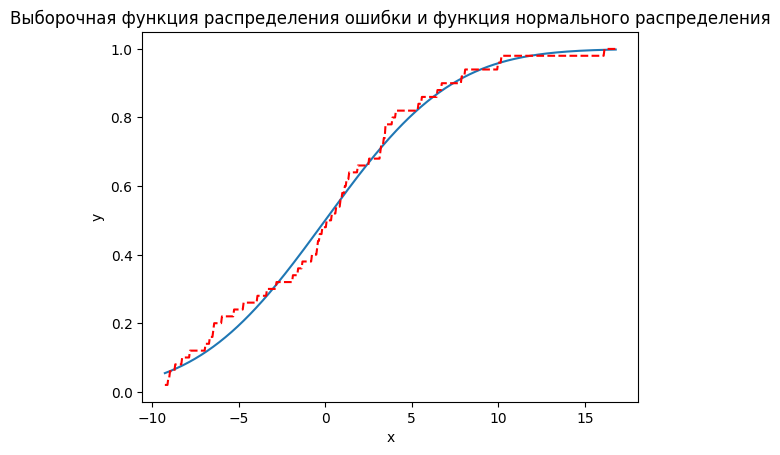

In [181]:
#Построим графики
plt.title('Выборочная функция распределения ошибки и функция нормального распределения')
plt.xlabel('x') 
plt.ylabel('y')
plt.plot(x, F_norm)
plt.plot(x, Fn, '--r')
plt.show()

**3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_{0}$ и $\beta_{1}$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$ для ($\beta_{0}$, $\beta_{1}$) (вычислить его полуоси).**

$\psi = C^T \beta$<br>
$b_\psi = C^T (XX^T)^{-1}C$<br>
$\cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r}$<br>
$x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2}$<br>
$P_\theta\left(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha\right) = 1 -\alpha$<br>
$\widehat \psi -x_{\alpha}s\sqrt{b} \le \psi \le \widehat \psi -x_{\alpha}s\sqrt{b}$ - доверительный интервал для $\psi$.

In [182]:
x_alpha = t.ppf(1-alpha/2, len(X)-len(beta))
print(f'x_alpha = {x_alpha}')
b_0 = np.linalg.inv(np.dot(X_with_intercept, X_with_intercept.T))[0,0]
print(f'b_0 = {b_0}')
interval_0 = [beta[0] - x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_0), beta[0] + x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_0)]
print(f'Доверительный интервал b_0: {interval_0}')

b_1 = np.linalg.inv(np.dot(X_with_intercept, X_with_intercept.T))[1,1]
print(f'b_1 = {b_1}')
interval_1 = [beta[1] - x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_1), beta[1] + x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_1)]
print(f'Доверительный интервал b_1: {interval_1}')

x_alpha = 1.6772241953450393
b_0 = 0.24426395939086296
Доверительный интервал b_0: [4.685519567827622, 14.256795152984608]
b_1 = 0.01015228426395939
Доверительный интервал b_1: [-0.9971682709256483, 0.954122585646458]


Доверительный эллипсоид уровня доверия 1 - $\alpha$<br>
$ A_\alpha = \{x: (x - \widehat \psi)^T (C^T (XX^T)^{-1}C)^{-1}(x - \widehat \psi) \le qs^2x_\alpha\}$, где
$ x_\alpha = F_{q, n-r}(x_\alpha) = 1 - \alpha$<br>
$ Для \; (\beta_0, \beta_1)$
$C = \begin{pmatrix}
    1 & 0\\
    0 & 1
\end{pmatrix} $

Пусть $ \begin{pmatrix}
    x\\
    y
\end{pmatrix}  = P(\widehat \psi - \psi)$, где P - матрица собственных векторов.<br>
Тогда уравнение доверительного эллипсоида выглядит таким образом:<br>
$(\widehat \psi -  \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\widehat \psi -  \psi) = \lambda_1 x^2 + \lambda_2 y^2 \le qs^2x_\alpha$, где $\lambda_1$ и $\lambda_2$ - собственные числа матрицы $XX^T$<br>

$\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2 \le 1$

In [183]:
eigenvalues, eigenvectors = np.linalg.eig(np.dot(X_with_intercept, X_with_intercept.T))
print(f'Собственные числа: {eigenvalues}')
print("Собственные векторы:")
print(eigenvectors.T)
func = f(2, len(X) - 2)
x_a = func.ppf(1 - alpha)
print(f'x_alpha = {x_a}')

print(f'\nБольшая полуось: {2 * unbiased_variance * x_a / eigenvalues[0]}')
print(f'Малая полуось: {2 * unbiased_variance * x_a / eigenvalues[1]}')

Собственные числа: [   3.9429745 1249.0570255]
Собственные векторы:
[[-0.98133062  0.19232838]
 [-0.19232838 -0.98133062]]
x_alpha = 2.416660110053031

Большая полуось: 40.856355280745234
Малая полуось: 0.12897374877734422


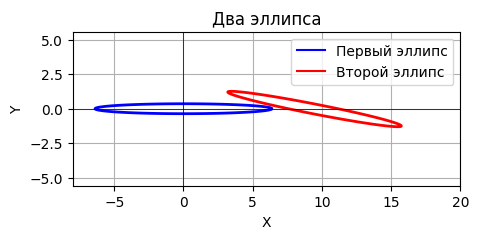

In [188]:
k_1 = np.sqrt(eigenvalues[0] / (2 * unbiased_variance * x_a))
k_2 = np.sqrt(eigenvalues[1] / (2 * unbiased_variance * x_a))

# Уравнение первого эллипса
def first_ellipse(x, y):
    return k_1**2 * x**2 + k_2**2 * y**2


def second_ellipse(b0, b1):
    return (eigenvectors.T[0,0] * (beta[0] - b0) + eigenvectors.T[0,1] * (beta[1] - b1))**2 * k_1**2 + (eigenvectors.T[1,0] * (beta[0] - b0) + eigenvectors.T[1,1] * (beta[1] - b1))**2 * k_2**2

# Генерация данных для построения графика
x_vals = np.linspace(-8, 20, 300)
y_vals = np.linspace(-4, 4, 500)
x, y = np.meshgrid(x_vals, y_vals)

# Построение графика
plt.figure(figsize=(5, 2))

# Первый эллипс
contour1 = plt.contour(x, y, first_ellipse(x, y), levels=[1], colors='blue', linewidths=2)
plt.plot([], [], color='blue', label='Первый эллипс')

# Второй эллипс
contour2 = plt.contour(x, y, second_ellipse(x, y), levels=[1], colors='red', linewidths=2)
plt.plot([], [], color='red', label='Второй эллипс')

# Добавление легенды
plt.legend()

plt.title('Два эллипса')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal') 
plt.show()

**4. Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости.**

In [189]:
# Выводим сумму квадратов отклонений, объясненную с помощью модели
SSE = np.sum((Y - (beta[0] + beta[1] * X)) ** 2)

# Выводим сумму квадратов остатков, оставшуюся после работы модели
SSR = np.sum((beta[0] + beta[1] * X - np.mean(Y)) ** 2)

# Выводим общую сумму квадратов отклонений
SST = SSE + SSR

MSE = SSE / (len(X) - len(beta))  # среднеквадратичное отклонение остатков
MSR = SSR / len(beta)  # среднеквадратичное отклонение объясненных отклонений

F = MSR / MSE  # вычисляем значение F-критерия

F_critical = f.ppf(1 - alpha, len(beta), len(X) - len(beta))  # критическое значение F-критерия
print(f'F-критерий {F}')
print(f'Критическое значение F = {F_critical}')
print(f'Гипотеза независимости переменной Y от переменной X {"отвергается" if F > F_critical else "не отвергается"}')

F-критерий 0.0006844905790919627
Критическое значение F = 2.416660110053031
Гипотеза независимости переменной Y от переменной X не отвергается


In [190]:
a_max = 1 - f.cdf(F, 1, len(X) - 3)
print(f'Гипотеза может быть принята, если уровень значимости не более: {a_max}')

Гипотеза может быть принята, если уровень значимости не более: 0.9792382814399402


**5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_{0}$, $\beta_{1}$, $\beta_{2}$ в данной модели. Изобразить графически полученную регрессионную зависимость.**

Линейная регрессионная модель переменной $Y$ по переменной $X$ выражается в виде уравнения $$Y=\beta_{0}+\beta_{1}X+\beta_{2}X^2+\varepsilon$$
В данной модели имеем нормальные уравнения в матричном виде: $X X^T \beta = XY$.<br>
Решением будет поиск матрицы коэффициентов $\beta =(X X^T)^{-1} XY$

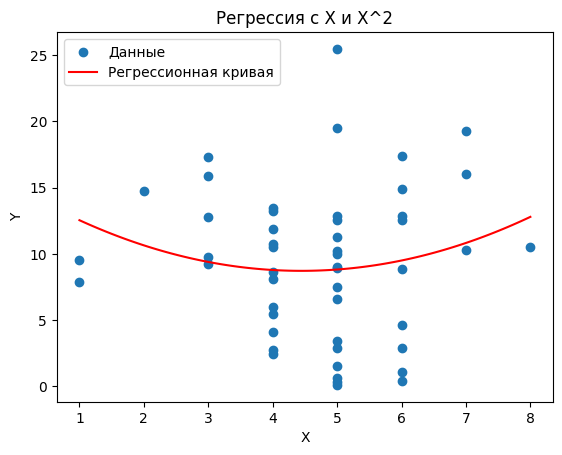

Новый вектор коэффициентов:  [15.07920542 -2.86461526  0.32229785]


In [191]:
# Добавление столбца с X^2
X_squared = X ** 2
X_extended = np.column_stack((np.ones_like(X), X, X_squared)).T

# МНК оценка параметров
beta_extended = np.linalg.inv(X_extended @ X_extended.T) @ X_extended @ Y

# Построение регрессионной кривой
x_range = np.linspace(min(X), max(X), 100)
y_range = beta_extended[0] + beta_extended[1] * x_range + beta_extended[2] * x_range**2

# Построение графика
plt.scatter(X, Y, label='Данные')
plt.plot(x_range, y_range, color='red', label='Регрессионная кривая')
plt.title('Регрессия с X и X^2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print("Новый вектор коэффициентов: ", beta_extended)

**6. Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.**

Несмещенная дисперсия:  32.30448678367321


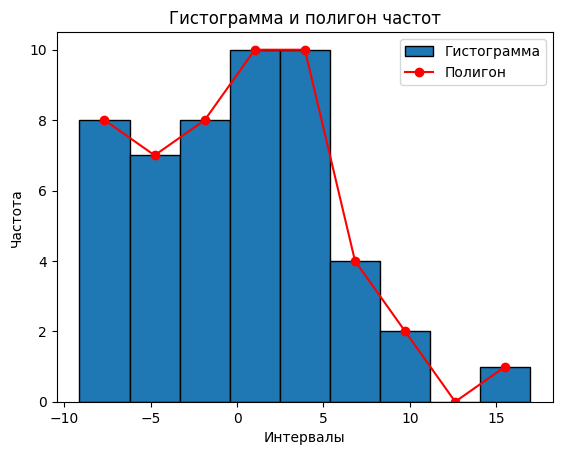

[ 8  7  8 10 10  4  2  0  1]
[-9.12423651 -6.22423651 -3.32423651 -0.42423651  2.47576349  5.37576349
  8.27576349 11.17576349 14.07576349 16.97576349]


In [192]:
# Предсказанные значения модели
predicted_values = beta_extended @ X_extended
# Ошибки модели
residuals = Y - predicted_values

# Оценка дисперсии
unbiased_variance = np.sum(residuals ** 2) / (len(Y) - len(beta))
print("Несмещенная дисперсия: ", unbiased_variance)

# Построение гистограммы ошибок
bins = np.arange(min(residuals), max(residuals) + h, h)
plt.hist(residuals, bins=bins, edgecolor='black', label='Гистограмма')
plt.title("Гистограмма и полигон частот")
plt.xlabel("Интервалы")
plt.ylabel("Частота")

hist, _ = np.histogram(residuals, bins=bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.plot(bin_centers, hist, color='red', marker='o', linestyle='-', label='Полигон')
plt.legend()
plt.show()

print(hist)
print(bins)

In [193]:
# проверка гипотезы нормальности ошибок на уровне значимости alpha=0.1
def calculate_expected_freq(n, intervals, variance):
  k = len(intervals)
  probabilities = norm.cdf(intervals[1:k], 0, np.sqrt(variance)) - norm.cdf(intervals[0:k-1], 0, np.sqrt(variance))
  return n*probabilities

expected_freq = calculate_expected_freq(len(X), bins, unbiased_variance)

chi_stats = np.sum((hist - expected_freq)**2 / expected_freq)
print(f'Статистика критерия chi^2 = {chi_stats:.3f}')

k = len(expected_freq)
x_alpha = chi2.ppf(1 - alpha, k-1-1)
print(f'Xalpha = {x_alpha:.3f}')

print(f'Гипотеза нормальности {"отвергается" if x_alpha < chi_stats else "не отвергается"}')

a_max = 1 - chi2.cdf(chi_stats, k-1-1)
print("Гипотеза может быть принята, если уровень значимости не более:", a_max)

Статистика критерия chi^2 = 7.653
Xalpha = 12.017
Гипотеза нормальности не отвергается
Гипотеза может быть принята, если уровень значимости не более: 0.3641627608724711


Далее оценивается расстояние оценки по Колмогорову.<br>
$H_0 : \varepsilon_1, ..., \varepsilon_n \sim \mathcal{N}(0, \widehat {\sigma^2})$<br>
$\sqrt{n} \cdot max|F_n(y) - F(y)| \sim K$, $K$ - распределение Колмогорова. 

In [194]:
# Оценка расстояния по Колмогорову
alpha = 0.1
x_alpha = ksone.ppf(1 - alpha, len(X))
print(f'x_alpha = {x_alpha}')

def F(x, array):
    s = 0
    for i in array:
        if i >= x:
            return s / len(X)
        s += 1
    return s / len(X)

a0 = 0.00
sig0 = np.sqrt(unbiased_variance)

sort_array = np.squeeze(sorted(Y - np.dot(beta_extended, X_extended)))

x = np.arange(-9.26, 16.83, 0.05)
F_norm = np.array([norm.cdf(i, a0, sig0) for i in x])
Fn = np.array([F(i, sort_array) for i in x])
diff = np.abs(Fn - F_norm)

D = np.max(diff)
Dn = D * np.sqrt(len(X))
Dn = round(Dn, 2)

print(f'Dn = {Dn}')
print(f'Гипотеза нормальности по Колмогорову {"отвергается" if Dn > x_alpha else "не отвергается"}')

x_alpha = 0.14839812573875721
Dn = 0.5
Гипотеза нормальности по Колмогорову отвергается


In [195]:
func = ksone(len(X))
a_max = 1 - func.cdf(Dn)
print(f'Гипотеза может быть принята, если уровень значимости не более: {a_max}')

Гипотеза может быть принята, если уровень значимости не более: 2.1964652319184097e-12


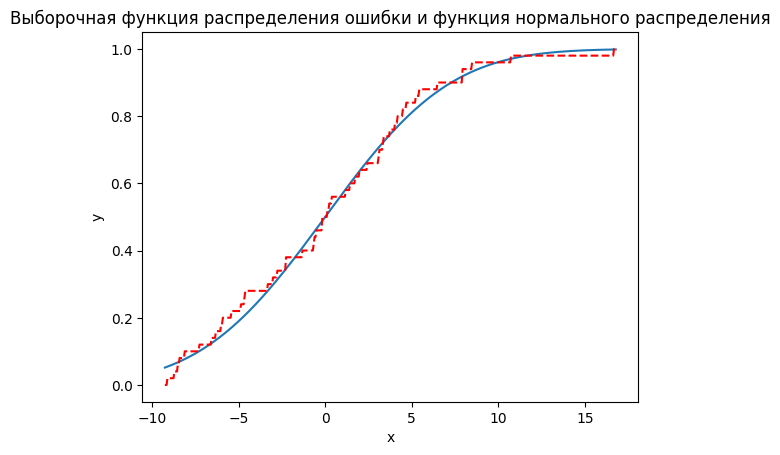

In [196]:
#Построим графики
plt.title('Выборочная функция распределения ошибки и функция нормального распределения')
plt.xlabel('x') 
plt.ylabel('y')
plt.plot(x, F_norm)
plt.plot(x, Fn, '--r')
plt.show()

**7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_{0}$, $\beta_{1}$, $\beta_{2}$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1 - \alpha$.**

$\psi = C^T \beta$<br>
$b_\psi = C^T (XX^T)^{-1}C$<br>
$\cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r}$<br>
$x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2}$<br>
$P_\theta\left(-x_\alpha \le \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \le x_\alpha\right) = 1 -\alpha$<br>
$\widehat \psi -x_{\alpha}s\sqrt{b} \le \psi \le \widehat \psi -x_{\alpha}s\sqrt{b}$ - доверительный интервал для $\psi$.

In [197]:
x_alpha = t.ppf(1-alpha/2, len(X)-len(beta_extended))
print(f'x_alpha = {x_alpha}')
b_0 = np.linalg.inv(np.dot(X_extended, X_extended.T))[0,0]
print(f'b_0 = {b_0}')
interval_0 = [beta_extended[0] - x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_0), beta_extended[0] + x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_0)]
print(f'Доверительный интервал b_0: {interval_0}')

b_1 = np.linalg.inv(np.dot(X_extended, X_extended.T))[1,1]
print(f'b_1 = {b_1}')
interval_1 = [beta_extended[1] - x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_1), beta_extended[1] + x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_1)]
print(f'Доверительный интервал b_1: {interval_1}')

x_alpha = 1.67792672077558
b_0 = 0.8830464270659449
Доверительный интервал b_0: [6.117386143034697, 24.041024705826782]
b_1 = 0.17432897176403606
Доверительный интервал b_1: [-6.8465047044799405, 1.1172741764650067]


Доверительный эллипсоид уровня доверия 1 - $\alpha$<br>
$ A_\alpha = \{x: (x - \widehat \psi)^T (C^T (XX^T)^{-1}C)^{-1}(x - \widehat \psi) \le qs^2x_\alpha\}$, где
$ x_\alpha = F_{q, n-r}(x_\alpha) = 1 - \alpha$<br>
$ Для \; (\beta_0, \beta_1, \beta_2)$
$C = \begin{pmatrix}
    1 & 0 & 0\\
    0 & 1 & 0\\
    0 & 0 & 1
\end{pmatrix} $

Пусть $ \begin{pmatrix}
    x\\
    y\\
    z
\end{pmatrix}  = P(\widehat \psi - \psi)$, где P - матрица собственных векторов.<br>
Тогда уравнение доверительного эллипсоида выглядит таким образом:<br>
$(\widehat \psi -  \psi)^T (C^T (XX^T)^{-1}C)^{-1}(\widehat \psi -  \psi) = \lambda_1 x^2 + \lambda_2 y^2 + \lambda_3 z^2 \le qs^2x_\alpha$, где $\lambda_1$, $\lambda_2$ и $\lambda_3$ - собственные числа матрицы $XX^T$<br>

$\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2 + \cfrac{\lambda_3}{qs^2x_\alpha}z^2 \le 1$

In [198]:
eigenvalues, eigenvectors = np.linalg.eig(np.dot(X_extended, X_extended.T))
print(f'Собственные числа: {eigenvalues}')
print("Собственные векторы:")
print(eigenvectors.T)
func = f(3, len(X) - 3)
x_a = func.ppf(1 - alpha)
print(f'x_alpha = {x_a}')

eigenvectors = np.round(eigenvectors, decimals=3)
eigenvalues = np.round(eigenvalues, decimals=3)

k_1 = np.sqrt(eigenvalues[0] / (3 * unbiased_variance * x_a))
k_1 = np.round(k_1, decimals=2)
k_2 = np.sqrt(eigenvalues[1] / (3 * unbiased_variance * x_a))
k_2 = np.round(k_2, decimals=2)
k_3 = np.sqrt(eigenvalues[2] / (3 * unbiased_variance * x_a))
k_3 = np.round(k_3, decimals=2)

print(f'Уравнение эллипсоида: {k_1**2} * ({eigenvectors.T[0,0]}({eigenvalues[0]} - beta_0){eigenvectors.T[0,1]}({eigenvalues[1]} - beta_1){eigenvectors.T[0,2]}({eigenvalues[2]} - beta_2))² \
\n+ {k_2**2} * ({eigenvectors.T[1,0]}({eigenvalues[0]} - beta_0)+{eigenvectors.T[1,1]}({eigenvalues[1]} - beta_1){eigenvectors.T[1,2]}({eigenvalues[2]} - beta_2))² \
\n+ {k_3**2} * ({eigenvectors.T[2,0]}({eigenvalues[0]} - beta_0){eigenvectors.T[2,1]}({eigenvalues[1]} - beta_1)+{eigenvectors.T[2,2]}({eigenvalues[2]} - beta_2))² <= 1')

Собственные числа: [3.82713793e+04 9.58082648e-01 6.36626615e+01]
Собственные векторы:
[[-0.03204746 -0.17341722 -0.98432689]
 [-0.91852849  0.39338654 -0.03940103]
 [-0.39405376 -0.90286959  0.1718957 ]]
x_alpha = 2.2041823911022664
Уравнение эллипсоида: 179.2921 * (-0.032(38271.379 - beta_0)-0.173(0.958 - beta_1)-0.984(63.663 - beta_2))² 
+ 0.004900000000000001 * (-0.919(38271.379 - beta_0)+0.393(0.958 - beta_1)-0.039(63.663 - beta_2))² 
+ 0.30250000000000005 * (-0.394(38271.379 - beta_0)-0.903(0.958 - beta_1)+0.172(63.663 - beta_2))² <= 1


Итоговое уравнение эллипсоида:<br>
$179.2921 \cdot (-0.032(38271.379 - \beta_0)-0.173(0.958 - \beta_1)-0.984(63.663 - \beta_2))^2+0.0049 \cdot (-0.919(38271.379 - \beta_0)+0.393(0.958 - \beta_1)-0.039(63.663 - \beta_2))^2+0.3025 \cdot (-0.394(38271.379 - \beta_0)-0.903(0.958 - \beta_1)+0.172(63.663 - \beta_2))^2 \le 1$

**8. Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.**

In [199]:
# Выводим сумму квадратов отклонений, объясненную с помощью модели
SSE = np.sum((Y - (beta_extended @ X_extended)) ** 2)

# Выводим сумму квадратов остатков, оставшуюся после работы модели
SSR = np.sum((beta_extended @ X_extended - np.mean(Y)) ** 2)

# Выводим общую сумму квадратов отклонений
SST = SSE + SSR

MSE = SSE / (len(X) - len(beta_extended))  # среднеквадратичное отклонение остатков
MSR = SSR / len(beta_extended)  # среднеквадратичное отклонение объясненных отклонений

F = MSR / MSE  # вычисляем значение F-критерия

F_critical = f.ppf(1 - alpha, len(beta_extended), len(X) - len(beta_extended))  # критическое значение F-критерия
print(f'F-критерий {F}')
print(f'Критическое значение F = {F_critical}')
print(f'Гипотеза зависимости переменной Y от переменной X {"отвергается" if F < F_critical else "не отвергается"}')

F-критерий 0.49790362101664304
Критическое значение F = 2.2041823911022664
Гипотеза зависимости переменной Y от переменной X отвергается


In [200]:
a_max = 1 - f.cdf(F, 1, len(X) - 3)
print(f'Гипотеза может быть принята, если уровень значимости не более: {a_max}')

Гипотеза может быть принята, если уровень значимости не более: 0.48390556325368583


## Выводы

В ходе выполнения лабораторной работы были получены теоретические знания о методе наименьших квадратов, а также практические навыки работы с МНК, функцией регрессии и регрессионным анализом. Был исследованы методы регрессионного анализа, такие как построение линейной и квадратичной регрессионных моеделей. Проведен анализ нормальности ошибок, построение доверительных интервалов и эллипсов. Кроме того, оценено расстояние до нормального распределения с использованием критерия Колмогорова и проверена гипотеза о зависимость переменных Y и X. Рассмотрены несмещённая оценка дисперсии $s^{2}$ и критерий $\chi^2$ для проверки гипотез. Все эти элементы позволяют проводить статистические выводы о параметрах модели и их значимости.